In [34]:
import os
import pandas as pd
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

class ESA_Mission_Universal_Analyzer:
    def __init__(self):
        self.missions = {
            'ESA-Mission1': {
                'anomalies': r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA\ESA-Mission1\ESA-Mission1\anomaly_types.csv"
            },
            'ESA-Mission2': {
                'anomalies': r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA\ESA-Mission2\ESA-Mission2\anomaly_types.csv"
            },
            'ESA-Mission3': {
                'anomalies': r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA\ESA-Mission3\ESA-Mission3\anomaly_types.csv"
            }
        }

    def analyze_mission(self, mission_name):
        filepath = self.missions[mission_name]['anomalies']
        if not os.path.exists(filepath):
            print(f"❌ Archivo no encontrado: {filepath}")
            return None

        print(f"\n🔍 Analizando misión: {mission_name}")
        try:
            df = pd.read_csv(filepath)
            if df.empty:
                print(f"⚠ El archivo está vacío: {os.path.basename(filepath)}")
                return None

            columnas_clave = ['Class', 'Subclass', 'Category', 'Dimensionality', 'Locality', 'Length']
            columnas_presentes = [col for col in columnas_clave if col in df.columns]

            resultados = []
            for _, fila in tqdm(df.iterrows(), total=len(df), desc="Procesando"):
                resultado = {'mission': mission_name}
                for col in columnas_presentes:
                    resultado[col.lower()] = fila.get(col)
                resultados.append(resultado)

            return pd.DataFrame(resultados)

        except Exception as e:
            print(f"⚠ Error al procesar {os.path.basename(filepath)}: {e}")
            return None

if __name__ == "__main__":
    print("🚀 Lanzando analizador ESA adaptado sin fechas")
    analyzer = ESA_Mission_Universal_Analyzer()

    all_results = []
    for mission_name in analyzer.missions:
        df_resultado = analyzer.analyze_mission(mission_name)
        if df_resultado is not None and not df_resultado.empty:
            all_results.append(df_resultado)

    if not all_results:
        print("\n🔴 No se generaron resultados. Revisa si los archivos tienen datos.")
    else:
        final_df = pd.concat(all_results).reset_index(drop=True)
        print("\n✅ Resultados listos:")
        print(final_df.head())

        os.makedirs("reports", exist_ok=True)
        final_df.to_csv("reports/esa_analysis_results.csv", index=False)
        print("\n💾 Resultados guardados en: reports/esa_analysis_results.csv")

🚀 Lanzando analizador ESA adaptado sin fechas

🔍 Analizando misión: ESA-Mission1


Procesando: 100%|██████████| 200/200 [00:00<00:00, 9799.43it/s]



🔍 Analizando misión: ESA-Mission2


Procesando: 100%|██████████| 644/644 [00:00<00:00, 8554.49it/s]



🔍 Analizando misión: ESA-Mission3


Procesando: 100%|██████████| 586/586 [00:00<00:00, 10829.21it/s]


✅ Resultados listos:
        mission    class    subclass    category dimensionality locality  \
0  ESA-Mission1  class_6  subclass_1  Rare Event   Multivariate   Global   
1  ESA-Mission1  class_7  subclass_1     Anomaly   Multivariate    Local   
2  ESA-Mission1  class_7  subclass_1     Anomaly   Multivariate   Global   
3  ESA-Mission1  class_7  subclass_1     Anomaly   Multivariate    Local   
4  ESA-Mission1  class_7  subclass_1     Anomaly   Multivariate    Local   

        length  
0  Subsequence  
1  Subsequence  
2  Subsequence  
3  Subsequence  
4  Subsequence  

💾 Resultados guardados en: reports/esa_analysis_results.csv


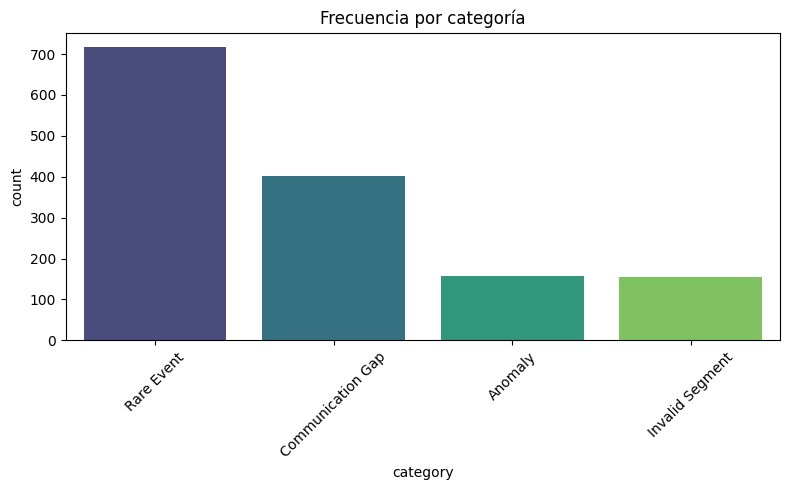

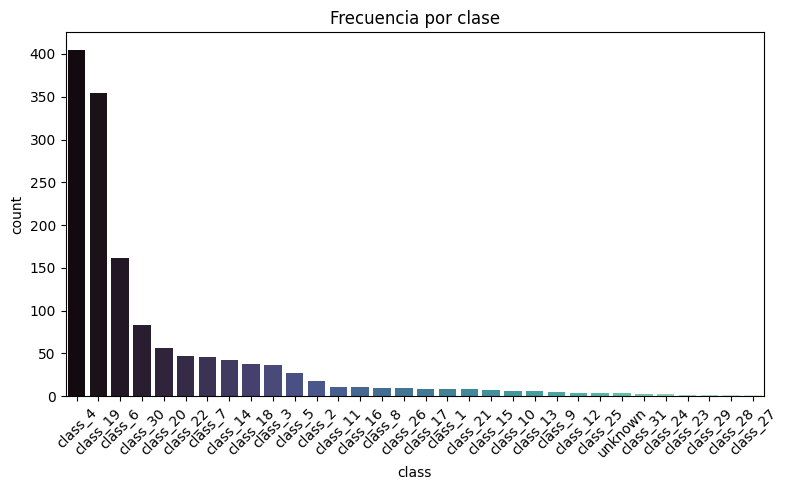

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("reports/esa_analysis_results.csv")

# Gráfico de barras por categoría
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette='viridis')
plt.title("Frecuencia por categoría")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/barplot_categoria.png")
plt.show()

# Gráfico de barras por clase
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index, palette='mako')
plt.title("Frecuencia por clase")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/barplot_clase.png")
plt.show()

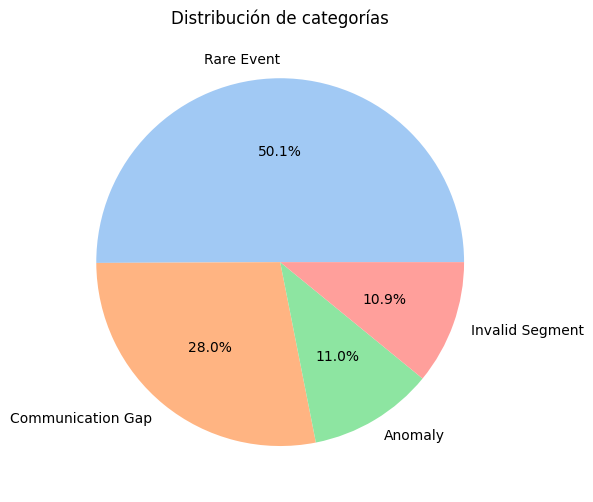

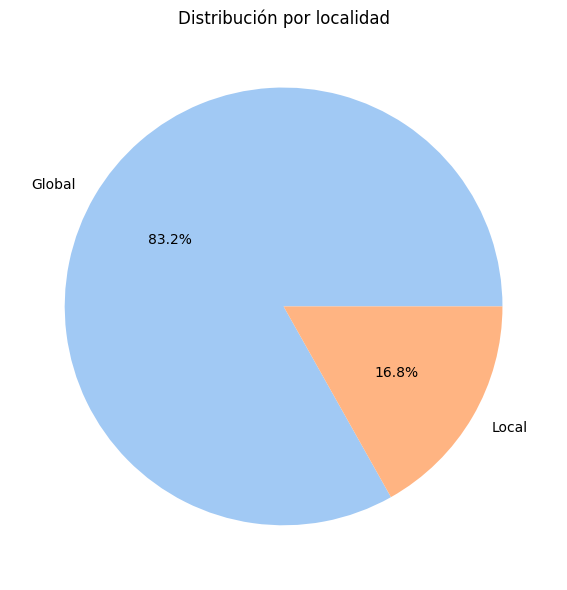

In [27]:
# Por categoría
plt.figure(figsize=(6, 6))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribución de categorías")
plt.ylabel("")
plt.tight_layout()
plt.savefig("figures/pie_categoria.png")
plt.show()

# Por localidad
plt.figure(figsize=(6, 6))
df['locality'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribución por localidad")
plt.ylabel("")
plt.tight_layout()
plt.savefig("figures/pie_localidad.png")
plt.show()

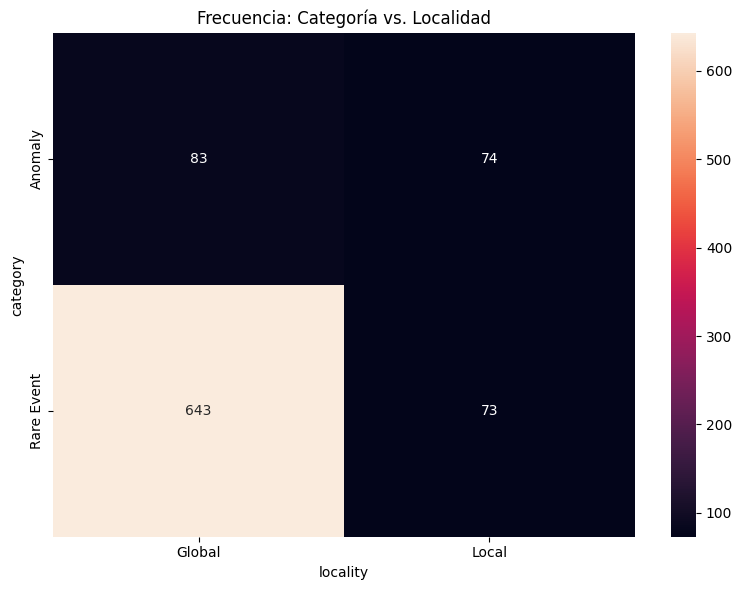

In [28]:
# Crear tabla cruzada
heatmap_data = df.groupby(['category', 'locality']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="rocket", cbar=True)
plt.title("Frecuencia: Categoría vs. Localidad")
plt.tight_layout()
plt.savefig("figures/heatmap_categoria_localidad.png")
plt.show()